# SILVER EDA CITIES TABLE 


In [3]:
# Librarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# 1. Leitura do ficheiro CSV

file_path = "C:/Users/jpgro/OneDrive/PG_Analitics_Data_Science/Projeto 2/data/cities.csv"
df_cities = pd.read_csv(file_path, encoding="windows-1254")

In [5]:
# 2. Visão geral dos dados
print("\n--- Dimensão do DataFrame ---")
print(df_cities.shape)

print("\n--- Primeiras linhas ---")
print(df_cities.head())

print("\n--- Tipos de dados ---")
print(df_cities.dtypes)

print("\n--- Presença de valores nulos por coluna ---")
print(df_cities.isnull().sum())


--- Dimensão do DataFrame ---
(63, 6)

--- Primeiras linhas ---
  store_id storetype_id  store_size city_id_old country_id city_code
0    S0036         ST04          21        C001     TURKEY   Denizli
1    S0005         ST04          19        C001     TURKEY   Denizli
2    S0104         ST04          47        C002     TURKEY    Ankara
3    S0068         ST03          14        C003     TURKEY     ?zmir
4    S0086         ST03          12        C003     TURKEY     ?zmir

--- Tipos de dados ---
store_id        object
storetype_id    object
store_size       int64
city_id_old     object
country_id      object
city_code       object
dtype: object

--- Presença de valores nulos por coluna ---
store_id        0
storetype_id    0
store_size      0
city_id_old     0
country_id      0
city_code       0
dtype: int64


In [7]:
# store_id (Primary key)
print("store_id")
print("Tipo:", df_cities['store_id'].dtype)
print("Nulos:", df_cities["store_id"].isnull().sum())
print("Duplicados:", df_cities.duplicated(subset=["store_id"]).sum())
print("Valores únicos:", df_cities["store_id"].nunique())

store_id
Tipo: object
Nulos: 0
Duplicados: 0
Valores únicos: 63


store_size
Tipo: int64
Nulos: 0
Valores negativos: 0
count    63.000000
mean     24.809524
std      12.611895
min       8.000000
25%      15.500000
50%      20.000000
75%      31.500000
max      63.000000
Name: store_size, dtype: float64


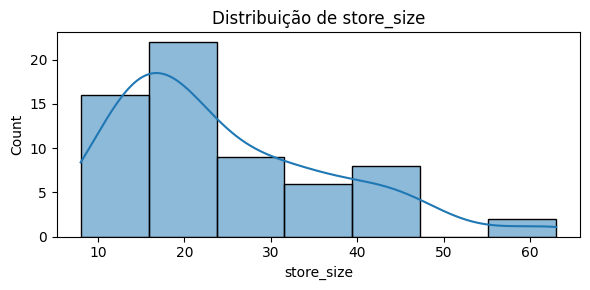

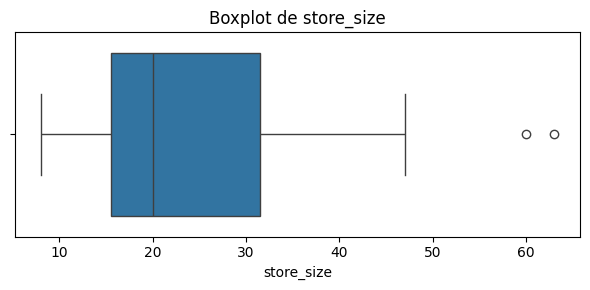

In [8]:
# Colunas Numéricas - apenas store_size

print(f"{'store_size'}")
print("Tipo:", df_cities['store_size'].dtype)
print("Nulos:", df_cities['store_size'].isnull().sum())
print("Valores negativos:", (df_cities['store_size'] < 0).sum() if pd.api.types.is_numeric_dtype(df_cities['store_size']) else "? (verifica tipo)")
print(df_cities['store_size'].describe())

# Distribuição dos valores
plt.figure(figsize=(6, 3))
sns.histplot(df_cities['store_size'], kde=True)
plt.title(f"Distribuição de {'store_size'}")
plt.tight_layout()
plt.show()

# Outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x=df_cities['store_size'])
plt.title(f"Boxplot de {'store_size'}")
plt.tight_layout()
plt.show()

storetype_id
Tipo: object
Nulos: 0
Valores únicos: 4
Frequência:
storetype_id
ST04    40
ST03    20
ST01     2
ST02     1
Name: count, dtype: int64

Frequência %:
storetype_id
ST04    63.49
ST03    31.75
ST01     3.17
ST02     1.59
Name: proportion, dtype: float64


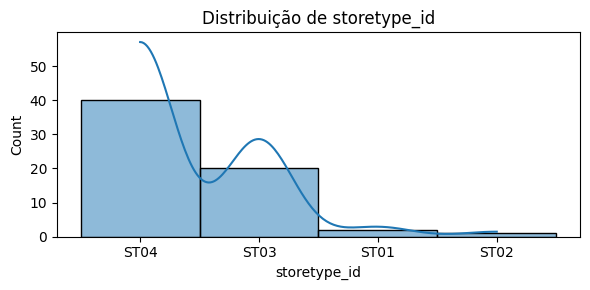

city_id_old
Tipo: object
Nulos: 0
Valores únicos: 19
Frequência:
city_id_old
C014    32
C005     5
C008     3
C006     3
C017     2
C001     2
C003     2
C013     2
C019     2
C002     1
Name: count, dtype: int64

Frequência %:
city_id_old
C014    50.79
C005     7.94
C008     4.76
C006     4.76
C017     3.17
C001     3.17
C003     3.17
C013     3.17
C019     3.17
C002     1.59
Name: proportion, dtype: float64


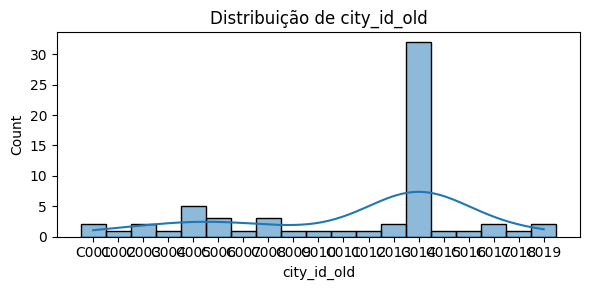

country_id
Tipo: object
Nulos: 0
Valores únicos: 1
Frequência:
country_id
TURKEY    63
Name: count, dtype: int64

Frequência %:
country_id
TURKEY    100.0
Name: proportion, dtype: float64


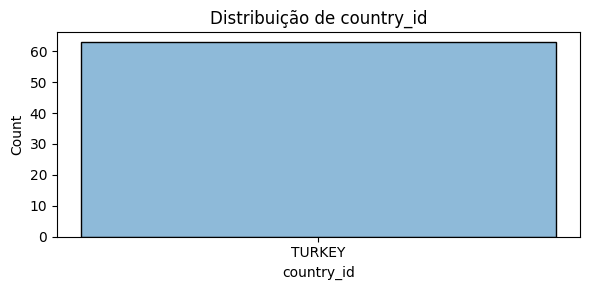

city_code
Tipo: object
Nulos: 0
Valores únicos: 19
Frequência:
city_code
Istanbul         32
Antalya           5
Sanl?urfa         3
Konya             3
Kahramanmaras     2
Denizli           2
?zmir             2
Samsun            2
Van               2
Ankara            1
Name: count, dtype: int64

Frequência %:
city_code
Istanbul         50.79
Antalya           7.94
Sanl?urfa         4.76
Konya             4.76
Kahramanmaras     3.17
Denizli           3.17
?zmir             3.17
Samsun            3.17
Van               3.17
Ankara            1.59
Name: proportion, dtype: float64


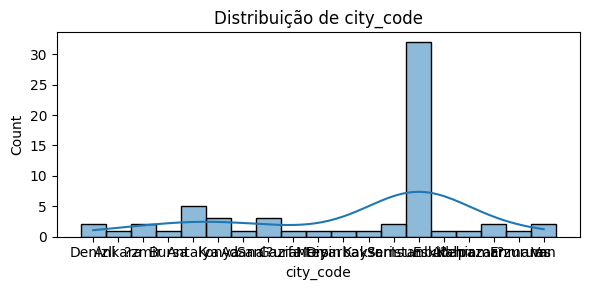

In [10]:
# Colunas categóricas
cat_cols = ["storetype_id", "city_id_old", "country_id", "city_code"]
for col_name in cat_cols:
    print(f"{col_name}")
    print("Tipo:", df_cities[col_name].dtype)
    print("Nulos:", df_cities[col_name].isnull().sum())
    print("Valores únicos:", df_cities[col_name].nunique())
    print("Frequência:")
    print(df_cities[col_name].value_counts(dropna=False).head(10))
    # Frequência %
    cat_cols_freq_percent = df_cities[col_name].value_counts(normalize=True, dropna=False).head(10) * 100
    print("\nFrequência %:")
    print(cat_cols_freq_percent.round(2))
    # Distribuição Visual dos valores
    plt.figure(figsize=(6, 3))
    sns.histplot(df_cities[col_name], kde=True)
    plt.title(f"Distribuição de {col_name}")
    plt.tight_layout()
    plt.show()

- city_code parece ser o nome da cidade o city_id_old parece ser o código da cidade, vamos averiguar:


In [ ]:
# Verificar se há um único código por nome de cidade
df_cities.groupby("city_code")["city_id_old"].nunique().sort_values(ascending=False)

city_code
?zmir            1
Adana            1
Adapazar?        1
Ankara           1
Antalya          1
Bursa            1
Denizli          1
Diyarbak?r       1
Erzurum          1
Eski?ehir        1
Gaziantep        1
Istanbul         1
Kahramanmaras    1
Kayseri          1
Konya            1
Mersin           1
Samsun           1
Sanl?urfa        1
Van              1
Name: city_id_old, dtype: int64

In [14]:
# Verificar se há um único nome de cidade por código
df_cities.groupby("city_id_old")["city_code"].nunique().sort_values(ascending=False)

city_id_old
C001    1
C002    1
C003    1
C004    1
C005    1
C006    1
C007    1
C008    1
C009    1
C010    1
C011    1
C012    1
C013    1
C014    1
C015    1
C016    1
C017    1
C018    1
C019    1
Name: city_code, dtype: int64

**Confirma-se que city_code corresponde ao nome da cidade e city_id_old ao id da cidade**

In [ ]:
df_cities[["city_id_old", "city_code"]].drop_duplicates().sort_values(by="city_id_old")

,city_id_old,city_code
0,C001,Denizli
2,C002,Ankara
3,C003,?zmir
5,C004,Bursa
6,C005,Antalya
11,C006,Konya
14,C007,Adana
15,C008,Sanl?urfa
18,C009,Gaziantep
19,C010,Mersin


In [ ]:
# Tratar nomes das cidades com erros de importação
df_cities["city_code"].dropna().unique()

array(['Denizli', 'Ankara', '?zmir', 'Bursa', 'Antalya', 'Konya', 'Adana',
       'Sanl?urfa', 'Gaziantep', 'Mersin', 'Diyarbak?r', 'Kayseri',
       'Samsun', 'Istanbul', 'Eski?ehir', 'Adapazar?', 'Kahramanmaras',
       'Erzurum', 'Van'], dtype=object)

In [ ]:
corrigir_cidades = {
    "?zmir": "Izmir",
    "Sanl?urfa": "Sanliurfa",
    "Diyarbak?r": "Diyarbakir",
    "Eski?ehir": "Eskisehir",
    "Adapazar?": "Adapazari"
}

df_cities["city_code"] = df_cities["city_code"].replace(corrigir_cidades)

# Verificar se a correção foi bem-sucedida
print("\n--- Cidades ---")
print(df_cities["city_code"].dropna().unique())


--- Cidades ---
['Denizli' 'Ankara' 'Izmir' 'Bursa' 'Antalya' 'Konya' 'Adana' 'Sanliurfa'
 'Gaziantep' 'Mersin' 'Diyarbakir' 'Kayseri' 'Samsun' 'Istanbul'
 'Eskisehir' 'Adapazari' 'Kahramanmaras' 'Erzurum' 'Van']


## Insights EDA:

- PrimaryKey (store_id):
    - Unicidade ok , sem duplicados e sem valores nulos
- Missing Values: não existem
- Invalid Values:
    - verificar se o store_size não deve ser multiplicado por 10
    - nomes de cidades erradas (tratamento manual na silver layer)
    - foi confirmada a associação única entre city_id_old e city_code
- Outliers:
    - Na store_size 2 outliers, pouco impacto (manter)
- Estatística:
    - storetype_id = ST04 tem 63% frequência
    - city_id_old = C014 (Instanbul) tem 50% frequência (claramente destacado)
    - Só 1 country (Turkey)
